# El método de Newton para intervalos

Igual que en la clase anterior, supondremos que $f(x)$ es una función continuamente diferenciable y que existe un valor $x^*$ donde $f(x^*)=0$ (es decir, $x^*$ es una raíz de $f$). Aquí abordaremos de nuevo cómo encontrar las raíces de $f$ dentro de un intervalo inicial $X$. Supondremos además que existe una extensión del intervalo $F'$ para la derivada $f'$, y que (por el momento) éste no contiene al cero: $0\notin F'(X)$.

La clave del método de Newton para intervalos está en aplicar el *teorema del valor medio*, que nos asegura que para cualquier $x\in X$ se cumple que

\begin{equation}
f(x) = f(x^*) + f'(\xi) \cdot (x-x^*),
\end{equation}

para algúna $\xi$ entre $x$ y $x^*$. Aquí, $\xi$ es un valor desconocido, pero podemos utilizar el hecho de que está contenido en el intervalo: $\xi \in X$.

Por lo tanto, obtenemos 

\begin{equation}
x^* = x - \frac{f(x)}{f'(\xi)} \in x - \frac{f(x)}{F'(X)} =: N(X,x),
\end{equation}
donde hemos definido un operador $N$ que actúa sobre un intervalo y *cualquier* punto en el intervalo.

Si suponemos que $x^*\in X$, entonces $x^* \in N(X,x)\cap X$ para toda $x\in X$.

Una elección particular es $x = m := \mathrm{mid}(X)$, el punto medio del intervalo $X$. Entonces obtenemos el llamado *operador de Newton para intervalos*:

\begin{equation}
N(X) := N(X,m) = m - \frac{f(m)}{F'(X)}.
\end{equation}

Nota que cuando implementamos esto en la computadora, en general $f(m)$ no se podrá calcular exactamente, por lo cual es necesario convertir $m$ en un intervalo $M := [m,m]$, y usar la extensión natural $F(M)$, así que tenemos finalmente 

\begin{equation}
N(X) := M - \frac{F(M)}{F'(X)},
\end{equation}
donde ahora todos son intervalos.

Ahora podemos definir una sucesión de intervalos a partir de un intervalo inicial $X_0$, dada por $X_{k+1} := X_k \cap N(X_k)$. Por construcción, si $x^*\in X_0$ entonces $x^*\in X_k$ para toda $k$. Entonces, si $X_0$ contiene a una raíz, la raíz se mantiene dentro de la secuencia de intervalos, que de hecho forman una secuencia anidada que converge a $x^*$. Entonces, si controlamos que de alguna manera el diámetro de los intervalos $x_k$ disminuya, obtendremos cotas precisas para $x^*$. Esto es el contenido del **Teorema del método de Newton para intervalos**.

Más aún, si $f(x)$ es doblemente continua y diferenciable y $N(X)$ está bien definida en el intervalo $X$, se puede demostrar que 

1. Si $N(X)\cap X = \emptyset$, es decir, $N(X)$ no se intersecta con $X$, entonces $X$ no contiene ninguna raíz de $f$.

2. Si $N(X) \subseteq X$, entonces $X$ contiene exactamente una raíz de $f$.



In [181]:
workspace()

In [60]:
pwd()

"/home/juser"

In [1]:
using PyPlot

INFO: Loading help data...


In [3]:
using Intervalos

In [4]:
using DerivadasNumericas

    ^(NumDerive,Real) at /home/juser/DerivadasNumericas.jl:63
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(NumDerive,Integer)
before the new definition.


In [5]:
#FUNCIONES NUEVAS A IMPLEMENTARSE EN EL MÓDULO DE INTERVALOS


function ExtendedDivision(x::Interval, y::Interval) #DIVISION EXTENDIDA (INTRODUCTION TO INTERVALS, MOORE)
    if contains(y,0.0)==false
          x/y
    else
        if y.left==0.0 && y.right>0.0
            return Interval(1/y.right, +Inf)
        else 
             if y.left<0.0 && y.right>0.0
                return [Interval(-Inf,1/y.left), Interval(1/y.right,+Inf)]
            else
                if y.right==0.0 && y.left<0.0
                    return Interval(-Inf,1/y.left)
                 end
             end
        end
    end
end


import Base.contains
function contains(x::Interval, n::Number) #NO ESTABA FUNCIONANDO EL CONTAINS ANTES UTILIZADO
    if x.left<=n && x.right>=n
        true
    else
        false
    end
end



function +(x::Interval,y::Array{Interval,1}) #SUMAS Y RESTAS ENTRE INTERVALOS CUANDO TENEMOS UN ARREGLO
    z=Interval[]
    for i=1:length(y)
        push!(z,x+y[i])
    end
end



function -(x::Interval,y::Array{Interval,1})
    z=Interval[]
    for i=1:length(y)
        push!(z,x-y[i])
    end
end

import Base.length
function length(x::Interval)
    return abs(x.right-x.left)
end

function Intersection(x::Interval, y::Interval) #INTERSECCIÓN DE DOS INTERVALOS
    if x.right>y.left
        return Interval(max(x.left,y.left), min(x.right, y.right))
    else
        false
    end
end

Intersection (generic function with 1 method)

In [6]:
function midpoint_roundUp(x::Interval)
    with_rounding(Float64,RoundUp) do
        midpoint_right=(x.left+ x .right)/2
    end
end

function midpoint_roundDown(x::Interval)
    with_rounding(Float64,RoundDown) do
        midpoint_right=(x.left+ x .right)/2
    end
end

function midpoint(x::Interval) #PuntoMedio
    return Interval(midpoint_roundDown(x), midpoint_roundUp(x))
end

midpoint (generic function with 1 method)

In [9]:
x=Interval(-1.0,2.0)
y=Interval(0.0,1.0)
z=Interval(-1.0,0.0)
w=Interval(-1.0,1.0);

$\frac{[-1.0,2.0]}{[0.0,1.0]}$

In [10]:
ExtendedDivision(x,y)

Interval(1.0,Inf)

$\frac{[-1.0,2.0]}{[-1.0,0.0]}$

In [11]:
ExtendedDivision(x,z)

Interval(-Inf,-1.0)

$\frac{[-1.0,2.0]}{[-1.0,1.0]}$

In [12]:
ExtendedDivision(x,w)

2-element Array{Interval,1}:
 Interval(-Inf,-1.0)
 Interval(1.0,Inf)  

[1] Escribe una función que calcule el operador de Newton para un intervalo $X$, dadas $f(x)$ y $f'(x)$.

[2] Implementa el método de Newton para intervalos para encontrar las raíces de $f(x) = x^3 - 1$ a partir de $X=[-3,3]$. Muestra gráficamente la implementación del método. En cada iteración subsecuente del método, ilustra qué le pasa al diámetro de la refincación del intervalo que vas obteniendo.


In [54]:
function D(f::Function, x::Number) #Defino la derivada para x_0 siendo un número y siendo un intervalo
    f(NumDerive(x,1)).d
end

function D(f::Function, X::Interval)
    Interval(f(NumDerive(x.left,1)).d,f(NumDerive(x.right,1)).d)
end 

function -(x::Interval)
    return Interval(-x.right,-x.left)
end

- (generic function with 250 methods)

Hagamos el cálculo de $\sqrt{2}$

In [95]:
F(x)=(x^2)-2.0
x=Interval(1.0,2.0)
M=midpoint(x)

Interval(1.5,1.5)

In [96]:
x=Intersection(M-(F(M)/D(F,x)),x)

Interval(1.375,1.4375)

In [97]:
x=Intersection(M-(F(M)/D(F,x)),x)

Interval(1.4090909090909092,1.4130434782608694)

In [98]:
x=Intersection(M-(F(M)/D(F,x)),x)

Interval(1.4112903225806452,1.4115384615384614)

In [99]:
x=Intersection(M-(F(M)/D(F,x)),x)

Interval(1.4114285714285715,1.4114441416893733)

Definiendo el operador con el que se va a iterar

In [189]:
function NewtonOperator(F::Function,X::Interval) #OPERADOR DE NEWTON
    M=midpoint(x)
    Intersection(M-ExtendedDivision(F(M),D(F,x)),x)
end

NewtonOperator (generic function with 1 method)

Definiendo la iteracion con un error

In [105]:
function FindRoot(f::Function,x::Interval,e::Float64)
    i=0
    while(length(x)>e)
        x=NewtonOperator(f,x)
        i+=1
            if(i==20)
                break
            end
    end
    return(x)
end
    

FindRoot (generic function with 1 method)

In [193]:
F(x)=(x^2)-2.0
x=Interval(1.0,2.0)
M=midpoint(x);

In [196]:
FindRoot(F,x,1e-16)

Interval(1.414213562373095,1.414213562373095)

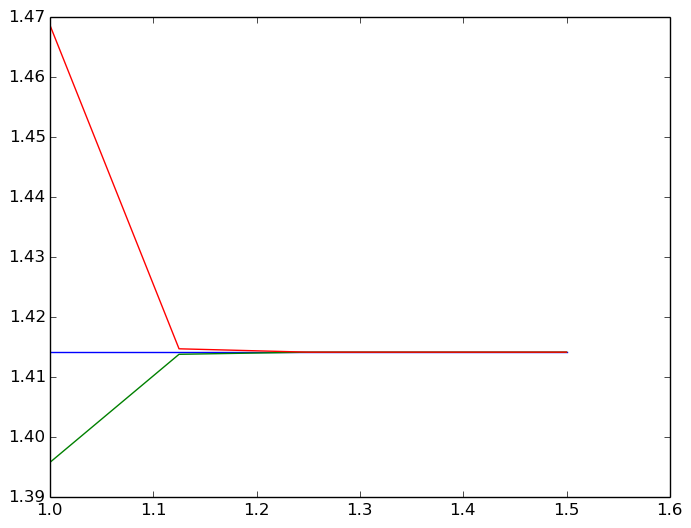

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9b161e4590>
 PyObject <matplotlib.lines.Line2D object at 0x7f9b161e4810>
 PyObject <matplotlib.lines.Line2D object at 0x7f9b161e4ed0>

In [195]:
Up=Float64[]
Down=Float64[]
Exacto=Float64[]

x=Interval(1.0,1.5)

n = [i for i in x.left:0.125:x.right]


for i in x.left:0.125:x.right
    push!(Up,NewtonOperator(F,x).left)
    push!(Down,NewtonOperator(F,x).right)
    x=NewtonOperator(F,x)
    push!(Exacto,sqrt(2))
end


plot(n,Exacto,n,Up,n,Down)

Se puede ver que el cálculo converge mucho más rápido que el método de Newton sin intervalos

In [218]:
F(x)=(x^3)-1.0
x=Interval(-3.0,3.0);

In [219]:
M=midpoint(x)

Interval(-0.0,0.0)

In [220]:
FindRoot(F,x,1e-15) #Aún no sé poruqe con este polinomio las funciones no "funcionan"

Interval(0.037037037037037035,0.03703703703703704)

[3] Usando tu implementación, *demuestra* que en el mismo intervalo $X=[-3,3]$ que $g(x) = x^2+1$ no tiene ninguna raíz. Ilustra gráficamente esto.

Hint: En el caso en que $0\in F'(x)$ las hipótesis del teorema no se cumplen. En ese caso hay que dividir el intervalo (bisección por ejemplo) y tratar de que las hipótesis del teorema se cumplan, para poder aplicarlo. Extiende tus funciones para que incluyan esta situación. En ese caso, cada subdivisión debe ser probada si puede o no tener una raíz.

In [221]:
F(x)=(x^2)+1.0
x=Interval(-3.0,3.0);

In [222]:
FindRoot(F,x,1e-15)

LoadError: `Intersection` has no method matching Intersection(::Nothing, ::Interval)
while loading In[222], in expression starting on line 1

[4] Considera la familia de polinomios de Wilkinson definidos por $W_n(x) = \prod_{i=1}^n(x-i)$. Partiendo de un intervalo simétrico alrededor de cero, implementa el método de Newton para encontrar sus raíces, utilizando diferenciación automática.

In [232]:
W(x)=(x-3.0)*(x-2.0)*(x-1.0)

W (generic function with 1 method)

In [235]:
x=Interval(-4.0,4.0)
FindRoot(W,x,1e-20)

Interval(0.056074766355140186,0.5454545454545455)

In [236]:
x=Interval(-3.0,3.0)
FindRoot(W,x,1e-20)

Interval(0.08108108108108107,3.0)

In [237]:
x=Interval(-2.0,2.0)
FindRoot(W,x,1e-20)

LoadError: `Intersection` has no method matching Intersection(::Nothing, ::Interval)
while loading In[237], in expression starting on line 2

In [238]:
x=Interval(-1.0,1.0)
FindRoot(W,x,1e-15)

Interval(0.23076923076923075,1.0)

## División extendida 

Hasta ahora, sólo hemos podido tratar el caso en el cual la derivada $F'(X)$ no contiene $0$. Sin embargo, resulta que es posible tratar también este caso, mediante "división extendida".

[5] Supón que $F'(X)$ sea un intervalo, digamos $F'(X) = [-a, b]$, que contiene $0$ (con $a, b > 0$). 

(i) Definiendo $1/A$ como el conjunto $\{1/x: x \in A \}$, evalúa $1/F'(X)$. 

(ii) Define una función que implementa esta "división extendida" de intervalos (o, más bien, inversa extendida).

[6] Resulta que el método de Newton sigue funcionando si utilizamos esta división extendida cuándo sea apropiado. Impleméntalo para encontrar *todas* las raíces de una función en un intervalo dado.

Nota que hay casos en los cuales no ocurre ninguna de las posibilidades (1) ni (2) en el teorema del método de Newton para intervalos. ¿Qué se puede hacer en este caso?

[7] Implementa pruebas (tests) para tu código.